# Oscar Dominguez
## Preparing Time Series from Wide-Form Data
## Date 06/09/2023 


You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.
    - Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    - Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv
    
Source - https://www.zillow.com/research/data/

**Part 1**
- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
            - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
        - Convert the melted dates into datetime datatype.
        - Make the datetime column the index.
    - Resample the dataframe as monthly frequency, grouped by City.
    
**Part 2**
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.
- Answer the following 2 questions using pandas:
    - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
        - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
    - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
        - Hint: you can use .diff() to calculate the change in values

# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading/Reading data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


## Filter the 4 largest cities into a new dataframe

In [2]:
df = df[(df['SizeRank'] < 4)]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [3]:
# Viewing columns
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

## Melt the data to long-form and prepare it for time series analysis

In [4]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], value_name='Home Value',var_name="Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [5]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   Home Value  1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


### Converting 'Date' column values to datetime objects

In [6]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Home Value  1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


### Setting Date as our index


In [7]:
melted = melted.set_index("Date")
melted


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


## Resample the dataframe as monthly frequency, grouped by City

In [8]:
df_ts = melted.groupby('RegionName').resample("MS").sum()
df_ts


/var/folders/5f/y13jb9491kgdgn16m3t57fq80000gn/T/ipykernel_4829/4010418620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").sum()


RegionID  SizeRank  Home Value
RegionName Date                                      
Chicago    2000-01-01     17426         3    166139.0
           2000-02-01     17426         3    166536.0
           2000-03-01     17426         3    167368.0
           2000-04-01     17426         3    168826.0
           2000-05-01     17426         3    170499.0
...                         ...       ...         ...
New York   2022-05-01      6181         0    768797.0
           2022-06-01      6181         0    773944.0
           2022-07-01      6181         0    777692.0
           2022-08-01      6181         0    779960.0
           2022-09-01      6181         0    781622.0

[1092 rows x 3 columns]

# Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.

In [9]:
cities = ['Chicago','Los Angeles','Houston', 'New York']
plot_df = df_ts.loc[cities].copy()
plot_df

RegionID  SizeRank  Home Value
RegionName Date                                      
Chicago    2000-01-01     17426         3    166139.0
           2000-02-01     17426         3    166536.0
           2000-03-01     17426         3    167368.0
           2000-04-01     17426         3    168826.0
           2000-05-01     17426         3    170499.0
...                         ...       ...         ...
New York   2022-05-01      6181         0    768797.0
           2022-06-01      6181         0    773944.0
           2022-07-01      6181         0    777692.0
           2022-08-01      6181         0    779960.0
           2022-09-01      6181         0    781622.0

[1092 rows x 3 columns]

In [10]:
# level 0 is RegionName
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [11]:
unstacked = plot_df.unstack(level=0)
unstacked


RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Date                                                                            
2000-01-01    17426   39051       12447     6181        3       2           1   
2000-02-01    17426   39051       12447     6181        3       2           1   
2000-03-01    17426   39051       12447     6181        3       2           1   
2000-04-01    17426   39051       12447     6181        3       2           1   
2000-05-01    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-01    17426   39051       12447     6181        3       2           1   
2022-06-01    17426   39051       12447     6181        3       2           1   
2022-07-01    17426   39051       12447     6181        3       2           1   
2022-08-01    17426   39051       12447     6181        3       2           1   
2022-09-01    17426   39051       12447     6181        3       2           1   

                    Home Value                                  
RegionName New York    Chicago   Houston Los Angeles  New York  
Date                                                            
2000-01-01        0   166139.0  109068.0    234181.0  253690.0  
2000-02-01        0   166536.0  109079.0    234401.0  255517.0  
2000-03-01        0   167368.0  108878.0    235513.0  257207.0  
2000-04-01        0   168826.0  108881.0    237589.0  260310.0  
2000-05-01        0   170499.0  108834.0    240113.0  263204.0  
...             ...        ...       ...         ...       ...  
2022-05-01        0   312487.0  265558.0    990391.0  768797.0  
2022-06-01        0   314663.0  268901.0    992337.0  773944.0  
2022-07-01        0   315910.0  271059.0    992630.0  777692.0  
2022-08-01        0   315587.0  272400.0    978196.0  779960.0  
2022-09-01        0   315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

In [12]:
unstacked.columns

MultiIndex([(  'RegionID',     'Chicago'),
            (  'RegionID',     'Houston'),
            (  'RegionID', 'Los Angeles'),
            (  'RegionID',    'New York'),
            (  'SizeRank',     'Chicago'),
            (  'SizeRank',     'Houston'),
            (  'SizeRank', 'Los Angeles'),
            (  'SizeRank',    'New York'),
            ('Home Value',     'Chicago'),
            ('Home Value',     'Houston'),
            ('Home Value', 'Los Angeles'),
            ('Home Value',    'New York')],
           names=[None, 'RegionName'])

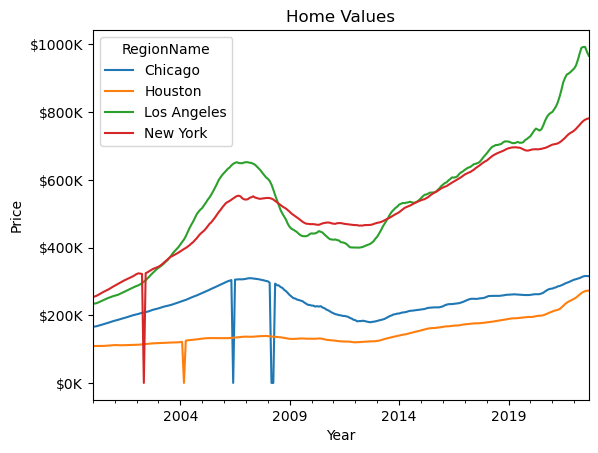

In [13]:
#Pl0tting
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

ax = unstacked['Home Value'].plot()

#Titles and labels
plt.title("Home Values")
plt.xlabel("Year")
plt.ylabel("Price")

# Y-axis formatting
# Source - https://stackoverflow.com/questions/40511476/how-to-properly-use-funcformatterfunc

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fK' % (x*1e-3)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter) 

## Answer the following 2 questions using pandas:
1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.
2. How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values
    
## 1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [14]:
unstacked.head()

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
Date                                                                            
2000-01-01    17426   39051       12447     6181        3       2           1   
2000-02-01    17426   39051       12447     6181        3       2           1   
2000-03-01    17426   39051       12447     6181        3       2           1   
2000-04-01    17426   39051       12447     6181        3       2           1   
2000-05-01    17426   39051       12447     6181        3       2           1   

                    Home Value                                  
RegionName New York    Chicago   Houston Los Angeles  New York  
Date                                                            
2000-01-01        0   166139.0  109068.0    234181.0  253690.0  
2000-02-01        0   166536.0  109079.0    234401.0  255517.0  
2000-03-01        0   167368.0  108878.0    235513.0  257207.0  
2000-04-01        0   168826.0  108881.0    237589.0  260310.0  
2000-05-01        0   170499.0  108834.0    240113.0  263204.0

In [15]:
unstacked.columns

MultiIndex([(  'RegionID',     'Chicago'),
            (  'RegionID',     'Houston'),
            (  'RegionID', 'Los Angeles'),
            (  'RegionID',    'New York'),
            (  'SizeRank',     'Chicago'),
            (  'SizeRank',     'Houston'),
            (  'SizeRank', 'Los Angeles'),
            (  'SizeRank',    'New York'),
            ('Home Value',     'Chicago'),
            ('Home Value',     'Houston'),
            ('Home Value', 'Los Angeles'),
            ('Home Value',    'New York')],
           names=[None, 'RegionName'])

In [20]:
df_ts.tail()

RegionID  SizeRank  Home Value
RegionName Date                                      
New York   2022-05-01      6181         0    768797.0
           2022-06-01      6181         0    773944.0
           2022-07-01      6181         0    777692.0
           2022-08-01      6181         0    779960.0
           2022-09-01      6181         0    781622.0

In [24]:
df_ts.loc[pd.IndexSlice[:,'12/2008'],'Home Value'].sort_values().tail(1)

RegionName  Date      
New York    2008-12-01    510309.0
Name: Home Value, dtype: float64

- New York had the home with the highest value end of 2008

## 2. How much did the home values change from November 2008 to December 2008 (in dollars)?

In [18]:
df_ts.loc[pd.IndexSlice['Home Value':, '2008'],:].diff()

RegionID  SizeRank  Home Value
RegionName  Date                                      
Houston     2008-01-01       NaN       NaN         NaN
            2008-02-01       0.0       0.0      -696.0
            2008-03-01       0.0       0.0      -717.0
            2008-04-01       0.0       0.0      -167.0
            2008-05-01       0.0       0.0      -400.0
            2008-06-01       0.0       0.0      -455.0
            2008-07-01       0.0       0.0      -381.0
            2008-08-01       0.0       0.0      -622.0
            2008-09-01       0.0       0.0      -838.0
            2008-10-01       0.0       0.0      -743.0
            2008-11-01       0.0       0.0      -942.0
            2008-12-01       0.0       0.0      -964.0
Los Angeles 2008-01-01  -26604.0      -1.0    471746.0
            2008-02-01       0.0       0.0     -6394.0
            2008-03-01       0.0       0.0    -10570.0
            2008-04-01       0.0       0.0    -14839.0
            2008-05-01       0.0       0.0    -16637.0
            2008-06-01       0.0       0.0    -14967.0
            2008-07-01       0.0       0.0    -15402.0
            2008-08-01       0.0       0.0    -13700.0
            2008-09-01       0.0       0.0    -10396.0
            2008-10-01       0.0       0.0     -9145.0
            2008-11-01       0.0       0.0     -9074.0
            2008-12-01       0.0       0.0    -12611.0
New York    2008-01-01   -6266.0      -1.0     77244.0
            2008-02-01       0.0       0.0      -440.0
            2008-03-01       0.0       0.0     -1536.0
            2008-04-01       0.0       0.0     -2697.0
            2008-05-01       0.0       0.0     -4180.0
            2008-06-01       0.0       0.0     -3875.0
            2008-07-01       0.0       0.0     -4599.0
            2008-08-01       0.0       0.0     -3921.0
            2008-09-01       0.0       0.0     -3943.0
            2008-10-01       0.0       0.0     -3299.0
            2008-11-01       0.0       0.0     -3281.0
            2008-12-01       0.0       0.0     -4458.0